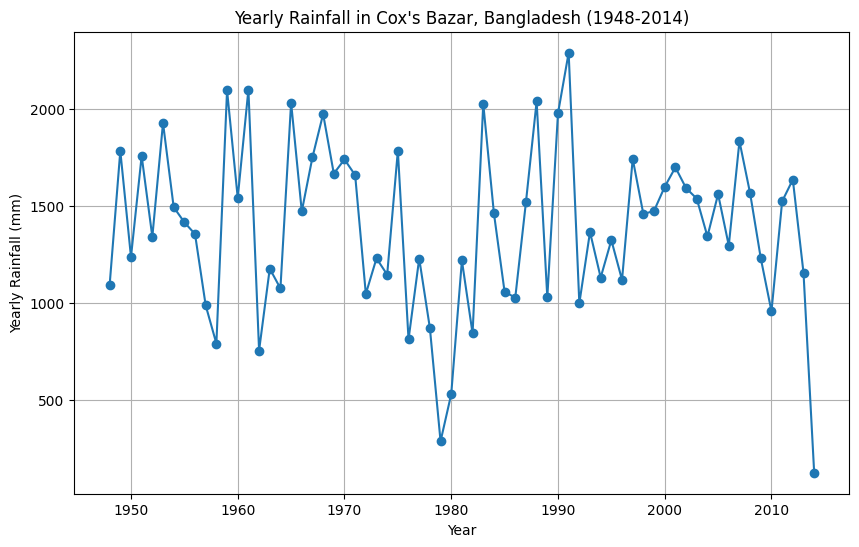

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

rainfall_data = 'data/rainfall_modified_data_bangladesh_1948_to_2014.csv'

# Read the CSV file
df = pd.read_csv(rainfall_data)

# Get unique values from a specific column
cox_rainfall = df[df['Station'] == "Cox's Bazar"].copy()

# Calculate the annual rainfall by summing up monthly totals
cox_rainfall['Yearly Rainfall'] = cox_rainfall[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].sum(axis=1)

# Group by year and sum the rainfall
yearly_rainfall = cox_rainfall.groupby('Year')['Yearly Rainfall'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title("Yearly Rainfall in Cox's Bazar, Bangladesh (1948-2014)")
plt.grid(True)
plt.show()

In [17]:
import pandas as pd

# Load the customized daily rainfall data
df = pd.read_csv('data/customized_daily_rainfall_data.csv')

# Filter data for Cox's Bazar from the year 2000 onwards
df = df[(df['Year'] >= 2000) & (df['Station'] == 'CoxsBazar')]

# Pivot the data to have columns for each day of the month
daily_rainfall_from2000 = df.pivot_table(index=['Year', 'Month'], columns='Day', values='Rainfall', fill_value=0)

# Calculate the total monthly rainfall
daily_rainfall_from2000['MonthlyRainfall'] = daily_rainfall_from2000.sum(axis=1)

# Reset the index to turn 'Year' and 'Month' into columns
daily_rainfall_from2000.reset_index(inplace=True)

# Ensure all days from 1 to 31 are present as columns
for day in range(1, 32):
    if day not in daily_rainfall_from2000.columns:
        daily_rainfall_from2000[day] = 0

# Reorder columns to match the desired format
columns = ['Year', 'Month'] + list(range(1, 32)) + ['MonthlyRainfall']
daily_rainfall_from2000 = daily_rainfall_from2000[columns]

# Save the new DataFrame to a CSV file
daily_rainfall_from2000.to_csv('data/daily_rainfall_from2000.csv', index=False)

# Display the new DataFrame
print(daily_rainfall_from2000)
daily_rainfall_from2000.head()

Day  Year  Month     1     2     3     4     5     6     7    8  ...   23  \
0    2000      1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  1.0   
1    2000      2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
2    2000      3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
3    2000      4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
4    2000      5  16.0   2.0  56.0   0.0  19.0   7.0  10.0  1.0  ...  8.0   
..    ...    ...   ...   ...   ...   ...   ...   ...   ...  ...  ...  ...   
199  2016      8  26.0   0.0   0.0   5.0  15.0  12.0  61.0  5.0  ...  0.0   
200  2016      9  26.0  56.0  30.0  12.0  17.0  38.0   3.0  7.0  ...  6.0   
201  2016     10   0.0   0.0   5.0  49.0   8.0   0.0   0.0  2.0  ...  0.0   
202  2016     11   0.0   0.0   0.0   0.0   9.0  15.0  17.0  0.0  ...  0.0   
203  2016     12   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   

Day     24    25    26    27    28    29    30   31  MonthlyRainfall  
0   

Day,Year,Month,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,MonthlyRainfall
0,2000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
3,2000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,16.0,6.0,4.0,0.0,3.0,0.0,65.0
4,2000,5,16.0,2.0,56.0,0.0,19.0,7.0,10.0,1.0,...,8.0,101.0,76.0,10.0,70.0,18.0,10.0,18.0,0.0,589.0


In [19]:
import pandas as pd

# Load the formatted daily rainfall data
df = pd.read_csv('data/daily_rainfall_from2000.csv')

# Group by Year and sum the MonthlyRainfall to get the annual rainfall
annual_rainfall_df = df.groupby('Year')['MonthlyRainfall'].sum().reset_index()

# Rename the column to 'AnnualRainfall'
annual_rainfall_df.rename(columns={'MonthlyRainfall': 'AnnualRainfall'}, inplace=True)

# Save the new DataFrame to a CSV file
annual_rainfall_df.to_csv('data/annual_rainfall_from2000.csv', index=False)

# Display the new DataFrame
print(annual_rainfall_df)

    Year  AnnualRainfall
0   2000          4707.0
1   2001          4014.0
2   2002          3918.0
3   2003          4113.0
4   2004          3282.0
5   2005          3384.0
6   2006          3529.0
7   2007          4006.0
8   2008          4144.0
9   2009          3283.0
10  2010          3438.0
11  2011          4440.0
12  2012          4123.0
13  2013          4059.0
14  2014          2483.0
15  2015          4716.0
16  2016          3297.0


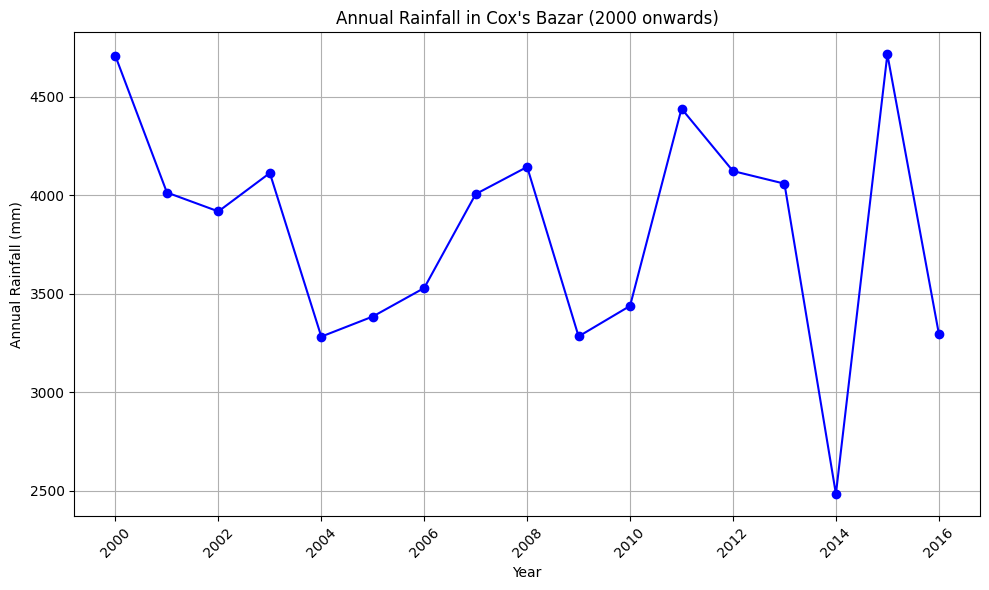

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the annual rainfall data
annual_rainfall_df = pd.read_csv('data/annual_rainfall_from2000.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(annual_rainfall_df['Year'], annual_rainfall_df['AnnualRainfall'], marker='o', linestyle='-', color='b')
plt.title('Annual Rainfall in Cox\'s Bazar (2000 onwards)')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()